In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [33]:
Parameter2 = pd.read_csv("Pyro Process Parameters-2.csv")
Parameter2.head()

,Unnamed: 0,TAG,A_431FM1_FI,B_431FM2_FI,C_431BE1_JT,D_471FN1_FT01,E_471FN2_FT01,F_471FN3_FT01,G_471FN4_FT01,H_471FN5_FT01,...,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,E _471FN2_PT01,F_471FN3_PT01,G_471FN4_PT01,H_471FN5_PT01,I_471FN6_PT01,J_471FN7_PT01
0,0,TAG DES,Kiln Feed,Kiln Feed,Kiln Feed BE KW,COOLER FAN-1 FOLW,COOLER FAN-2 FOLW,COOLER FAN-3 FOLW,COOLER FAN-4 FOLW,COOLER FAN-5 FOLW,...,BURNING ZONE TEMP,Kiln rpm,Kiln current,kiln M.DRIVE POWER,COOLER FAN-2 PRESSURE,COOLER FAN-3 PRESSURE,COOLER FAN-4 PRESSURE,COOLER FAN-5 PRESSURE,COOLER FAN-6 PRESSURE,COOLER FAN-7 PRESSURE
1,1,UNIT,TPH,TPH,Kw,m³/min,m³/min,m³/min,m³/min,m³/min,...,°C,rpm,A,Kw,mmWc,mmWc,mmWc,mmWc,mmWc,mmWc
2,2,06-01-2019 00:00,0,299.4,102,580.5,1052.4,1348.2,1152.5,1033.9,...,1135.5,5,388,383.3,837.8,882.3,842.3,796.9,587.4,390.9
3,3,06-01-2019 01:00,0,300.1,101.7,580.7,1050,1338.9,1126.7,1047,...,1141.8,5,399.5,397.7,859.7,889.9,842,794.5,588.7,388.9
4,4,06-01-2019 02:00,0,299.6,101.8,579.9,1051,1355.8,1180.8,1036,...,1134.9,5,400.5,394.8,840.7,880.1,841.2,792.1,598.6,401.1


In [34]:
Parameter2 = Parameter2.drop([0,1])
Parameter2 = Parameter2.iloc[:,2:]
Parameter2 = Parameter2.drop(['L_SPC_COOLING_AIR'], axis=1) #Removing SP Cooler air, as it is all zero
# Parameter2 = Parameter2.drop(['I_Kiln RPM'], axis=1) #Removing Kiln RPM, too much bias
Parameter2.head()

,A_431FM1_FI,B_431FM2_FI,C_431BE1_JT,D_471FN1_FT01,E_471FN2_FT01,F_471FN3_FT01,G_471FN4_FT01,H_471FN5_FT01,I_471FN6_FT01,J_471FN7_FT01,...,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,E _471FN2_PT01,F_471FN3_PT01,G_471FN4_PT01,H_471FN5_PT01,I_471FN6_PT01,J_471FN7_PT01
2,0,299.4,102,580.5,1052.4,1348.2,1152.5,1033.9,766.6,724.8,...,1135.5,5,388,383.3,837.8,882.3,842.3,796.9,587.4,390.9
3,0,300.1,101.7,580.7,1050,1338.9,1126.7,1047,764.9,722.6,...,1141.8,5,399.5,397.7,859.7,889.9,842,794.5,588.7,388.9
4,0,299.6,101.8,579.9,1051,1355.8,1180.8,1036,774,735.3,...,1134.9,5,400.5,394.8,840.7,880.1,841.2,792.1,598.6,401.1
5,0,300,101.7,580,1049.6,1355.7,1152.9,1010.8,777,740.4,...,1123.4,5,398.7,396.3,844.3,883.8,847.5,804.9,612.2,412.9
6,0,299.7,101.3,579.4,1050.4,1365.7,1178.5,1027.1,756.9,710.3,...,1111.8,5,393.2,386.7,835.2,877.5,843.3,802.3,604,407.8


In [35]:
Param2_feed = pd.to_numeric(Parameter2.iloc[:,0]) + pd.to_numeric(Parameter2.iloc[:,1]) #Adding Both the kiln feed column
for i in range(0,len(Parameter2)):
    Parameter2.iloc[i,:] = pd.to_numeric(Parameter2.iloc[i,:])
Parameter2.iloc[:,1] = Param2_feed
Parameter2 = Parameter2.drop(['A_431FM1_FI'], axis=1) #Removing the first Kiln feed. After updating it with added values
Parameter2.head()

,B_431FM2_FI,C_431BE1_JT,D_471FN1_FT01,E_471FN2_FT01,F_471FN3_FT01,G_471FN4_FT01,H_471FN5_FT01,I_471FN6_FT01,J_471FN7_FT01,K_471CLNKR_TT,...,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,E _471FN2_PT01,F_471FN3_PT01,G_471FN4_PT01,H_471FN5_PT01,I_471FN6_PT01,J_471FN7_PT01
2,299.4,102,580.5,1052.4,1348.2,1152.5,1033.9,766.6,724.8,110.4,...,1135.5,5,388,383.3,837.8,882.3,842.3,796.9,587.4,390.9
3,300.1,101.7,580.7,1050,1338.9,1126.7,1047,764.9,722.6,109.6,...,1141.8,5,399.5,397.7,859.7,889.9,842,794.5,588.7,388.9
4,299.6,101.8,579.9,1051,1355.8,1180.8,1036,774,735.3,108.8,...,1134.9,5,400.5,394.8,840.7,880.1,841.2,792.1,598.6,401.1
5,300.0,101.7,580,1049.6,1355.7,1152.9,1010.8,777,740.4,105.6,...,1123.4,5,398.7,396.3,844.3,883.8,847.5,804.9,612.2,412.9
6,299.7,101.3,579.4,1050.4,1365.7,1178.5,1027.1,756.9,710.3,106.4,...,1111.8,5,393.2,386.7,835.2,877.5,843.3,802.3,604,407.8


In [36]:
Parameter2_numpy = Parameter2.iloc[:,:].to_numpy()
means = np.mean(Parameter2_numpy, axis=0)               #Holds the array of mean of all features column-wise
print("Total number of data points taken "  + str(len(Parameter2.iloc[:,1])))

Total number of data points taken 6374


In [37]:
STDs = []                                                  #List of standard deviation
# stable = [0,1,2,3,4,5,6,7,8,11,12,13]  #This is the lsit of columns that are stable
#Total 21 columns left
Bad_value_index = set()      #This will store the Gaussian anomalous indexes row-wise
for j in range(0,21):
    Parameter2_std = Parameter2.iloc[:,j]
    STDs.append(np.std(Parameter2_std, axis=0))             #Calculate the standard deviation of respective column
    if True:#j not in stable:
        for i in range(0, len(Parameter2.iloc[:,1])):
            if i in Bad_value_index:
                continue
            else:
                if abs(Parameter2_numpy[i][j] - means[j]) > 2*STDs[j]: #or  abs(Parameter2_numpy[i][13] - means[13]) > 2*stds:
                    Bad_value_index.add(i)

In [38]:
Bad_values = list(Bad_value_index)
Bad_values.sort()
print("There are " + str(len(Bad_values)) + " rows with differnet from others. In other words they are statistically anomalous");
print("The index of these rows are stored in list Bad_values.")

There are 957 rows with differnet from others. In other words they are statistically anomalous
The index of these rows are stored in list Bad_values.


In [39]:
Anomalious = pd.read_csv("Pyro Process Parameters-2.csv")
Anomalious = Anomalious.drop(['L_SPC_COOLING_AIR'], axis=1)  #Removing SP Cooler air, as it is all zero
# Anomalious = Anomalious.drop(['I_Kiln RPM'], axis=1)         #Removing Kiln RPM, too much bias
Anomalious = Anomalious.drop(['A_431FM1_FI'], axis=1) #Removing the first Kiln feed
Unnamed = list(Anomalious.iloc[2:,0])
dateTime = list(Anomalious.iloc[2:,1])
end = len(Anomalious.iloc[:,1])
End = []
for i in range(2+len(Bad_values),end):
    End.append(i)
Anomalious = Anomalious.drop(End)
Anomalious.head()

,Unnamed: 0,TAG,B_431FM2_FI,C_431BE1_JT,D_471FN1_FT01,E_471FN2_FT01,F_471FN3_FT01,G_471FN4_FT01,H_471FN5_FT01,I_471FN6_FT01,...,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,E _471FN2_PT01,F_471FN3_PT01,G_471FN4_PT01,H_471FN5_PT01,I_471FN6_PT01,J_471FN7_PT01
0,0,TAG DES,Kiln Feed,Kiln Feed BE KW,COOLER FAN-1 FOLW,COOLER FAN-2 FOLW,COOLER FAN-3 FOLW,COOLER FAN-4 FOLW,COOLER FAN-5 FOLW,COOLER FAN-6 FOLW,...,BURNING ZONE TEMP,Kiln rpm,Kiln current,kiln M.DRIVE POWER,COOLER FAN-2 PRESSURE,COOLER FAN-3 PRESSURE,COOLER FAN-4 PRESSURE,COOLER FAN-5 PRESSURE,COOLER FAN-6 PRESSURE,COOLER FAN-7 PRESSURE
1,1,UNIT,TPH,Kw,m³/min,m³/min,m³/min,m³/min,m³/min,m³/min,...,°C,rpm,A,Kw,mmWc,mmWc,mmWc,mmWc,mmWc,mmWc
2,2,06-01-2019 00:00,299.4,102,580.5,1052.4,1348.2,1152.5,1033.9,766.6,...,1135.5,5,388,383.3,837.8,882.3,842.3,796.9,587.4,390.9
3,3,06-01-2019 01:00,300.1,101.7,580.7,1050,1338.9,1126.7,1047,764.9,...,1141.8,5,399.5,397.7,859.7,889.9,842,794.5,588.7,388.9
4,4,06-01-2019 02:00,299.6,101.8,579.9,1051,1355.8,1180.8,1036,774,...,1134.9,5,400.5,394.8,840.7,880.1,841.2,792.1,598.6,401.1


In [40]:
#Starting overwriting
for i in range(len(Bad_values)):
    temp = Bad_values[i]
    Anomalious.iloc[2+i,1] = dateTime[temp]
    Anomalious.iloc[2+i,2:24] = Parameter2.iloc[temp,:]
Anomalious.to_csv("Anomaliousdata-Parameter2.csv")

In [41]:
Parameter2 = Parameter2.drop(Bad_values)
print(len(Parameter2.iloc[:,1]))
Parameter2.to_csv("Gaussian_Anomalous_Parameter2.csv")

5417


In [42]:
Parameter2

,B_431FM2_FI,C_431BE1_JT,D_471FN1_FT01,E_471FN2_FT01,F_471FN3_FT01,G_471FN4_FT01,H_471FN5_FT01,I_471FN6_FT01,J_471FN7_FT01,K_471CLNKR_TT,...,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,E _471FN2_PT01,F_471FN3_PT01,G_471FN4_PT01,H_471FN5_PT01,I_471FN6_PT01,J_471FN7_PT01
2,299.4,102,580.5,1052.4,1348.2,1152.5,1033.9,766.6,724.8,110.4,...,1135.5,5,388,383.3,837.8,882.3,842.3,796.9,587.4,390.9
3,300.1,101.7,580.7,1050,1338.9,1126.7,1047,764.9,722.6,109.6,...,1141.8,5,399.5,397.7,859.7,889.9,842,794.5,588.7,388.9
4,299.6,101.8,579.9,1051,1355.8,1180.8,1036,774,735.3,108.8,...,1134.9,5,400.5,394.8,840.7,880.1,841.2,792.1,598.6,401.1
5,300.0,101.7,580,1049.6,1355.7,1152.9,1010.8,777,740.4,105.6,...,1123.4,5,398.7,396.3,844.3,883.8,847.5,804.9,612.2,412.9
6,299.7,101.3,579.4,1050.4,1365.7,1178.5,1027.1,756.9,710.3,106.4,...,1111.8,5,393.2,386.7,835.2,877.5,843.3,802.3,604,407.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,270.8,103,650.6,1197.8,1218.8,1205.9,1147.4,847,840.5,530,...,1299.7,4.5,413.9,379.6,939.1,871,829.6,769.1,608.3,479.6
6372,274.1,104.3,649.7,1194.9,1193.1,1159.7,1162.8,908.6,909.7,530,...,1358.4,4.7,389.1,365,937.4,856.3,804.2,770.9,641.2,503.4
6373,274.6,104,651.2,1194.4,1225.5,1219.9,1176.2,829.7,829.7,530,...,1286.7,4.8,379.5,356.9,943.7,887.4,840.8,763.9,563.6,440.9
6374,274.3,103.9,649.8,1200.2,1329.6,1244.3,1190.9,769,766.8,530,...,1297.9,4.8,395.3,379.7,925.8,908.6,844.6,763.6,528.3,400.1


In [43]:
trainin = Parameter2.iloc[1000:, :] #0-kiln feed, 9-Clinker Temp, 10-SP Cooler Air
trainoutlet = Parameter2.iloc[1000:, :] #15 kiln-Current (J_461KL1_IZ)
validatein = Parameter2.iloc[0:1000, :]
validateoutlet = Parameter2.iloc[0:1000,:]
trainin = trainin.to_numpy()
trainoutlet = trainoutlet.to_numpy()
validatein = validatein.to_numpy()
validateoutlet = validateoutlet.to_numpy()
print(trainin)
print(trainoutlet)

[[270.9 96.4 627.8 ... 740.1 493.7 356.1]
 [271.0 96.1 600.9 ... 737.3 489.3 354.0]
 [270.7 95.8 606.3 ... 760.0 507.6 377.9]
 ...
 [274.6 104.0 651.2 ... 763.9 563.6 440.9]
 [274.3 103.9 649.8 ... 763.6 528.3 400.1]
 [274.0 103.8 650.9 ... 753.1 541.9 423.9]]
[[270.9 96.4 627.8 ... 740.1 493.7 356.1]
 [271.0 96.1 600.9 ... 737.3 489.3 354.0]
 [270.7 95.8 606.3 ... 760.0 507.6 377.9]
 ...
 [274.6 104.0 651.2 ... 763.9 563.6 440.9]
 [274.3 103.9 649.8 ... 763.6 528.3 400.1]
 [274.0 103.8 650.9 ... 753.1 541.9 423.9]]


In [44]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
normalizetrain_in = Normalization(axis=-1)
normalizetrain_outlet = Normalization(axis=-1)
normalizevalidate_in = Normalization(axis=-1)
normalizevalidate_outlet = Normalization(axis=-1)
trainin = trainin.astype(np.float32)
trainoutlet = trainoutlet.astype(np.float32)
validatein = validatein.astype(np.float32)
validateoutlet = validateoutlet.astype(np.float32)
normalizetrain_in.adapt(trainin)
normalizetrain_outlet.adapt(trainoutlet)
normalizevalidate_in.adapt(validatein)
normalizevalidate_outlet.adapt(validateoutlet)
trainin_normalize = normalizetrain_in(trainin)
trainoutlet_normalize = normalizetrain_outlet(trainoutlet)
validatein_normalize = normalizevalidate_in(validatein)
validateoutlet_normalize = normalizevalidate_outlet(validateoutlet)
print(validatein_normalize)

tf.Tensor(
[[ 1.6876799   1.3207682  -0.26817366 ...  1.3981843   1.0379136
   0.40399072]
 [ 1.7241815   1.2601801  -0.2639106  ...  1.3442379   1.0603876
   0.3533011 ]
 [ 1.6981094   1.2803771  -0.2809616  ...  1.2902915   1.2315371
   0.66250795]
 ...
 [ 0.37885895  0.35136715  0.16663498 ... -0.5258846   0.03175847
   0.30261153]
 [ 0.2328557   0.1696058   0.23483913 ...  0.40243298 -1.1196148
  -1.3143862 ]
 [ 0.19114095  0.1696058   0.78474456 ...  0.3327535  -0.6977905
  -0.60726655]], shape=(1000, 22), dtype=float32)


In [45]:
layerin = keras.Input(shape=(22,))
x = keras.layers.Dense(30,activation="relu",activity_regularizer=regularizers.l1(0.008))(layerin)
x = keras.layers.Dense(20,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(10,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(20,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(30,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(22)(x)
model = keras.Model(inputs=layerin,outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
dense (Dense)                (None, 30)                690       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_5 (Dense)              (None, 22)                682   

In [46]:
model.compile(optimizer="adam",loss="mean_squared_error")
validation_set = tf.data.Dataset.from_tensor_slices((validatein,validateoutlet))
history = model.fit(trainin_normalize,trainoutlet_normalize,batch_size=40,epochs=100,validation_data=(validatein_normalize,validateoutlet_normalize))

Train on 4417 samples, validate on 1000 samples
Epoch 1/100
4417/4417 [==============================] - 5s 1ms/sample - loss: 0.9798 - val_loss: 0.9077
Epoch 2/100
4417/4417 [==============================] - 0s 41us/sample - loss: 0.7642 - val_loss: 0.7901
Epoch 3/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.6632 - val_loss: 0.7204
Epoch 4/100
4417/4417 [==============================] - 0s 40us/sample - loss: 0.5915 - val_loss: 0.6692
Epoch 5/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.5478 - val_loss: 0.6412
Epoch 6/100
4417/4417 [==============================] - 0s 41us/sample - loss: 0.5219 - val_loss: 0.6265
Epoch 7/100
4417/4417 [==============================] - 0s 39us/sample - loss: 0.5008 - val_loss: 0.6121
Epoch 8/100
4417/4417 [==============================] - 0s 42us/sample - loss: 0.4831 - val_loss: 0.5985
Epoch 9/100
4417/4417 [==============================] - 0s 39us/sample - loss: 0.4719 - val_loss: 0.5888

4417/4417 [==============================] - 0s 39us/sample - loss: 0.1875 - val_loss: 0.3167
Epoch 78/100
4417/4417 [==============================] - 0s 41us/sample - loss: 0.1869 - val_loss: 0.3111
Epoch 79/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.1898 - val_loss: 0.3432
Epoch 80/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.2028 - val_loss: 0.3280
Epoch 81/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.1932 - val_loss: 0.3140
Epoch 82/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.1862 - val_loss: 0.3094
Epoch 83/100
4417/4417 [==============================] - 0s 38us/sample - loss: 0.1832 - val_loss: 0.3141
Epoch 84/100
4417/4417 [==============================] - 0s 39us/sample - loss: 0.1850 - val_loss: 0.3114
Epoch 85/100
4417/4417 [==============================] - 0s 37us/sample - loss: 0.1826 - val_loss: 0.3081
Epoch 86/100
4417/4417 [==========================

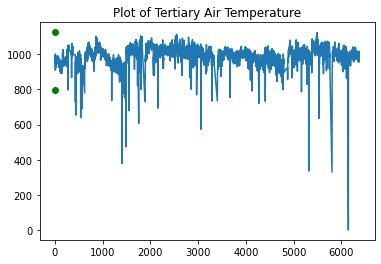

In [47]:
import matplotlib.pyplot as plt
#Plotting Tertiary Air Temperature with a TAG of F_451PC1_TT04 in Parameter2, and column no. of 10 in Parameter-2
# print(Parameter2.loc[:,'F_451PC1_TT04'])
plt.plot(Parameter2.loc[:,'F_451PC1_TT04'])
plt.title('Plot of Tertiary Air Temperature')
index = 10
Max = STDs[index] + means[index]
Min = means[index] - STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

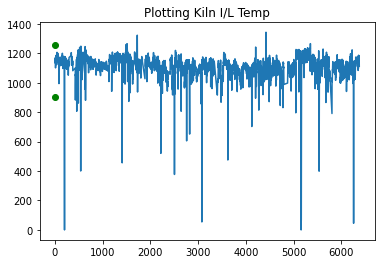

In [48]:
#Plotting Kiln I/L Temp with a TAG of G_461KL1_TT01 in Parmeter2, and column no. of 11 in Parameter-2
plt.plot(Parameter2.loc[:,'G_461KL1_TT01'])
plt.title('Plotting Kiln I/L Temp')
index = 11
Max = STDs[index] + means[index]
Min = means[index] - STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

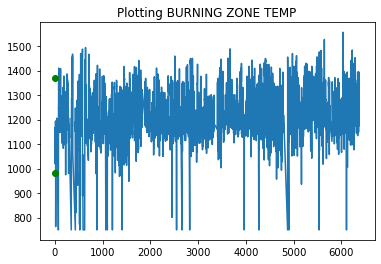

In [49]:
#Plotting BURNING ZONE TEMP with a TAG of H_461KL1_PYRO_MTR in Parameter2, and column no. of 12 in Parameter-2
plt.plot(Parameter2.loc[:,'H_461KL1_PYRO_MTR'])
plt.title('Plotting BURNING ZONE TEMP')
index = 12
Max = STDs[index] + means[index]
Min = means[index] - STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

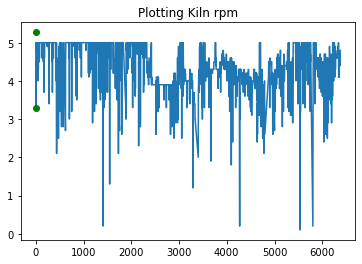

In [50]:
#Plotting Kiln rpm with a TAG of I_Kiln RPM in Parameter2, and column no. of 13 in Parameter-2
plt.plot(Parameter2.loc[:,'I_Kiln RPM'])
plt.title('Plotting Kiln rpm')
index = 13
Max = STDs[index] + means[index]
Min = means[index] - 1*STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

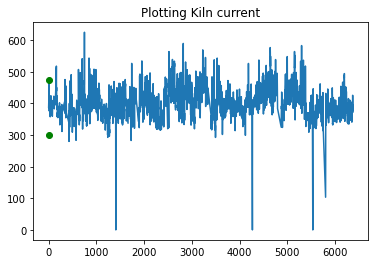

In [51]:
#Plotting Kiln current with a TAG of J_461KL1_IZ in Parameter2, and column no. of 14 in Parameter-2
plt.plot(Parameter2.loc[:,'J_461KL1_IZ'])
plt.title('Plotting Kiln current')
index = 14
Max = STDs[index] + means[index]
Min = means[index] - 1*STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

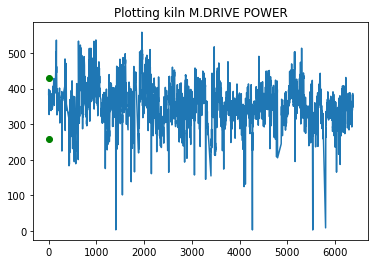

In [52]:
#Plotting kiln M.DRIVE POWER with a TAG of K_461KL1_JZ_EM in Parameter2, and column no. of 15 in Parameter-2
plt.plot(Parameter2.loc[:,'K_461KL1_JZ_EM'])
plt.title('Plotting kiln M.DRIVE POWER')
index = 15
Max = STDs[index] + means[index]
Min = means[index] - 1*STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

In [53]:
Parameter2_test = pd.read_csv("Pyro Process Parameters-2.csv")
Parameter2_test = Parameter2_test.drop([0,1])
Parameter2_test = Parameter2_test.iloc[:,2:]
Parameter2_test = Parameter2_test.drop(['L_SPC_COOLING_AIR'], axis=1) #Removing SP Cooler air, as it is all zero
# # Parameter2 = Parameter2.drop(['I_Kiln RPM'], axis=1) #Removing Kiln RPM, too much bias
Param2_feed_test = pd.to_numeric(Parameter2_test.iloc[:,0]) + pd.to_numeric(Parameter2_test.iloc[:,1])
for i in range(0,len(Parameter2_test)):
    Parameter2_test.iloc[i,:] = pd.to_numeric(Parameter2_test.iloc[i,:])
Parameter2_test.iloc[:,1] = Param2_feed_test
Parameter2_test = Parameter2_test.drop(['A_431FM1_FI'], axis=1) #Removing the first Kiln feed
# Parameter2_test = Parameter2_test.iloc[:,1:]
Parameter2_test = Parameter2_test.to_numpy()
# # Parameter2_test

In [54]:
# Parameter2_test = pd.read_csv("Bad_values_removed1.csv")
# Parameter2_test = Parameter2_test.iloc[:,1:]
# Parameter2_test = Parameter2_test.to_numpy()

In [55]:
normalizer_test = Normalization(axis=-1)
normalizer_test.adapt(Parameter2_test)
Parameter2_test = Parameter2_test.astype(np.float32)
Param2_test = normalizer_test(Parameter2_test)
print(Param2_test)

tf.Tensor(
[[ 1.3813777   0.59738    -0.27126843 ...  0.33926612  0.3517357
   0.07349999]
 [ 1.4091392   0.55527437 -0.26916474 ...  0.3228482   0.36183012
   0.05091758]
 [ 1.3893099   0.5693103  -0.27757886 ...  0.30643028  0.43870327
   0.1886704 ]
 ...
 [ 0.39784476  0.8780812   0.47234145 ...  0.1135221   0.16692844
   0.63806015]
 [ 0.38594645  0.8640464   0.45761624 ...  0.11146954 -0.1071758
   0.17737919]
 [ 0.37404934  0.8500115   0.46918625 ...  0.0396419  -0.00157158
   0.44610968]], shape=(6374, 22), dtype=float32)


In [58]:
Parameter2_input = model.predict(Param2_test)
diff = Parameter2_input - Param2_test
loss_model = []
for i in range(0,len(diff)):
    diff_process = 0
    for j in range(22):
        diff_process = diff_process+diff[i,j]
    loss_model.append(diff_process)
print(len(loss_model))

6374


Text(0.5, 1.0, 'Model Loss')

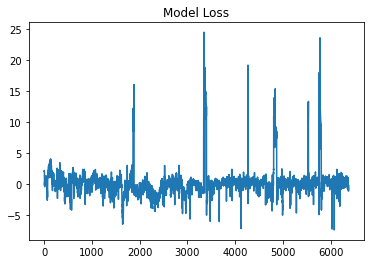

In [61]:
plt.plot(loss_model)
plt.title('Model Loss')

In [62]:
anomalyModel = []
for i in range(0,len(loss_model)):
    if loss_model[i] > 5 or loss_model[i] < -5:
        anomalyModel.append(i)

anomalyStatus = []
for a in anomalyModel:
    if a in Bad_values:
        anomalyStatus.append("True, anomaly")
    else:
        anomalyStatus.append("False, anomaly")
print("By using 2X(standard deviation) there are %d anomalous cases." %(len(Bad_values)))
print("Out of %d test examples, the model thinks that %d are anomalous.\n" %(6374, len(anomalyModel)))
print("Out of 6374 test examples, the model truly detected anomaly on " + str(anomalyStatus.count("True, anomaly")) + " cases." + " TRUE POSITIVE(Anomalous)")
print("Out of 6374 test examples, the model falsly detected anomaly on " + str(anomalyStatus.count("False, anomaly")) + " cases." + "FALSE POSITIVE(Anomalous)")
print("Out of 6374 test examples, the model falsly detected normalcy on %d-%d = %d cases. FALSE NEGATIVE(normalcy)" %(len(Bad_values), len(anomalyModel), len(Bad_values) - len(anomalyModel)))

By using 2X(standard deviation) there are 957 anomalous cases.
Out of 6374 test examples, the model thinks that 220 are anomalous.

Out of 6374 test examples, the model truly detected anomaly on 220 cases. TRUE POSITIVE(Anomalous)
Out of 6374 test examples, the model falsly detected anomaly on 0 cases.FALSE POSITIVE(Anomalous)
Out of 6374 test examples, the model falsly detected normalcy on 957-220 = 737 cases. FALSE NEGATIVE(normalcy)


Since, We were not provided with the exact anmalous data points. We had use the statistical method to determine anomalous data points. The accuracy of the model in detecting truly anomalous is quite good (223/224). However, according to 2 times of standard deviation, there are still 733 anomalous according to statistic, where the model detected normalcy. These can can be improved if the actual anomalous data was used, instead of statistically determining anomalous data. 